In [ ]:
# library
import keras
import tensorflow as tf
import time
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# split the data
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
# augmentation data
rotation_range_val = 30
width_shift_val = 0.25
height_shift_val = 0.25
shear_val=45
zoom_val=[0.5,1.5]

datagen = ImageDataGenerator(rotation_range = rotation_range_val, 
                             width_shift_range = width_shift_val,
                             height_shift_range = height_shift_val,
                             zoom_range=zoom_val,
                             shear_range=shear_val)
                  

BEFORE:



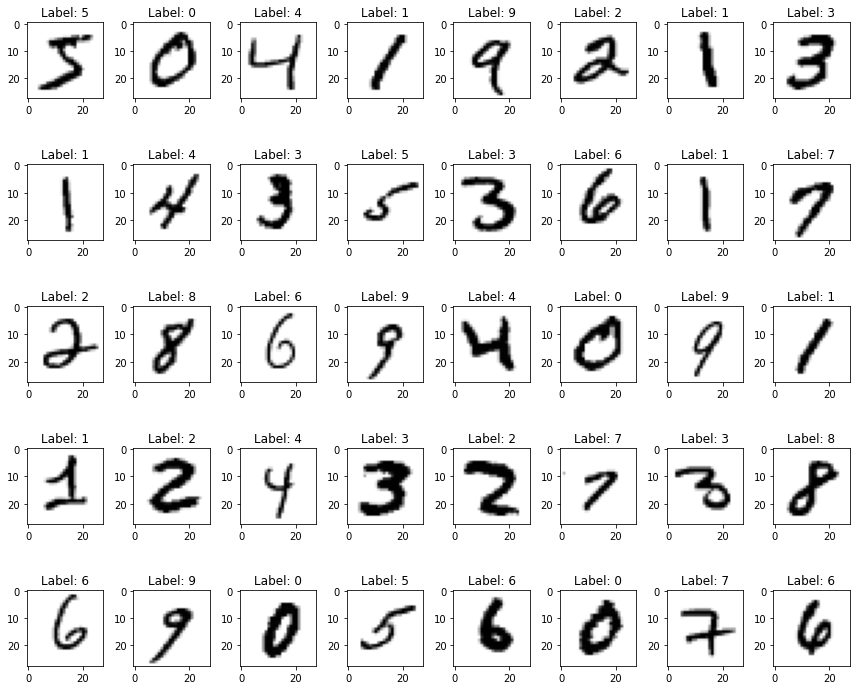

AFTER:



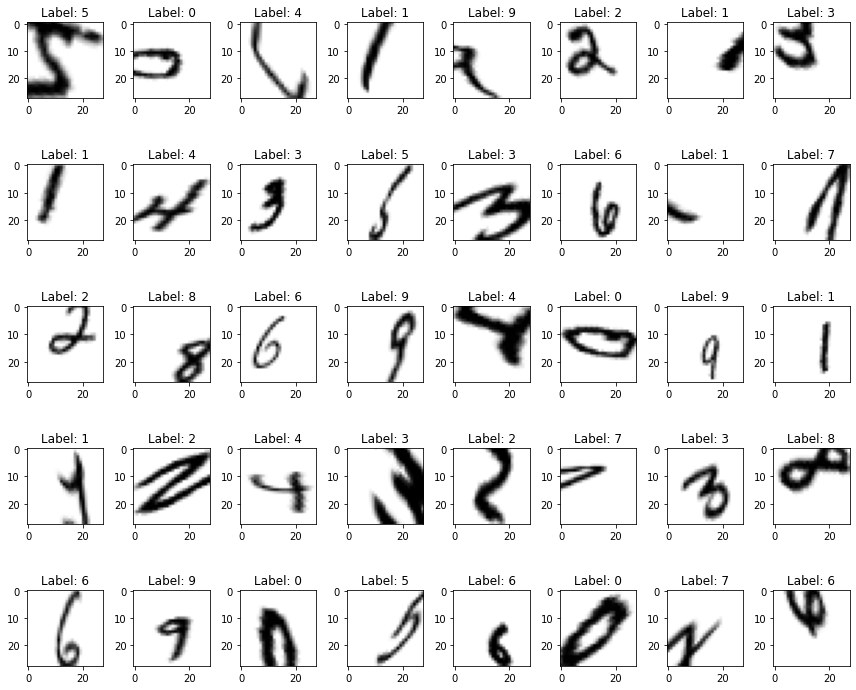

In [ ]:
# show image
# fit the generator
datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 5
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1), 
                         y_train.reshape(y_train.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

In [ ]:
# preprocessing image
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)
# convert class vectors to binary class
y_train = to_categorical(y_train, num_classes=None)
y_test = to_categorical(y_test, num_classes=None)

In [ ]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_train /= 255
print("x_train shape: ", x_train.shape)
print("x_test shape: ",x_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28, 1)


In [ ]:
# Create the model
# CNN
batch_size = 128
num_classes = 10
epochs = 10

model= Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape = 
                 input_shape))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))


In [ ]:
# model.compile(loss=keras.los)
model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
# Train the model
start = time.time()
fitting = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/10
469/469 [==============================] - 150s 318ms/step - loss: 0.7824 - accuracy: 0.7507 - val_loss: 6537.0762 - val_accuracy: 0.9070
Epoch 2/10
469/469 [==============================] - 147s 314ms/step - loss: 0.3221 - accuracy: 0.9032 - val_loss: 3958.0305 - val_accuracy: 0.9413
Epoch 3/10
469/469 [==============================] - 150s 319ms/step - loss: 0.2739 - accuracy: 0.9183 - val_loss: 3568.5017 - val_accuracy: 0.9516
Epoch 4/10
469/469 [==============================] - 146s 312ms/step - loss: 0.2488 - accuracy: 0.9246 - val_loss: 3802.4497 - val_accuracy: 0.9517
Epoch 5/10
469/469 [==============================] - 145s 309ms/step - loss: 0.2292 - accuracy: 0.9296 - val_loss: 3013.1162 - val_accuracy: 0.9614
Epoch 6/10
469/469 [==============================] - 146s 311ms/step - loss: 0.2130 - accuracy: 0.9367 - val_loss: 2855.5012 - val_accuracy: 0.9622
Epoch 7/10
469/469 [==============================] - 147s 313ms/step - loss: 0.2047 - accuracy: 0.9388 - 

In [ ]:
model.save('final_model.h5')

In [ ]:
# evaluate the model
score = model.evaluate(x_test, y_test, verbose =0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Test loss:  2727.7958984375
Test accuracy:  0.9672999978065491


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


4


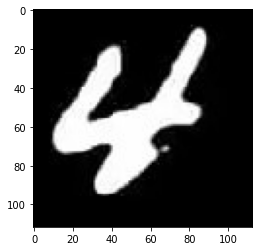

In [ ]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.image as mpimg

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('./empat.jpg')
  # imgplot = plt.imshow(img)
	# load model
	model = load_model('final_model.h5')
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)
 
# entry point, run the example
plt.imshow(mpimg.imread('./empat.jpg'))
run_example()
